# Word Embedding Experiments
Here we implement all experiments for evaluating the classification performance of different kinds of pretrained word embeddings for complex word identification.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.wsd import lesk
import nltk
from collections import namedtuple

In [69]:
MAIN_PATH_DATASET = "../cwishareddataset/traindevset/english/"
genres = ['Wikipedia', 'WikiNews', 'News']
datasets = ['Train', 'Dev']
columns = ['id', 'sentence', "start", "end", "target", 
           "nat", "non_nat", "nat_marked", "non_nat_marked", "binary", "prob"]

Model = namedtuple('Model', 'type, name, dimension, corpus, model')
Dataset = namedtuple('Dataset', 'name, train, test')

datasets = [Dataset('Wikipedia', 'Train', 'Dev'),
            Dataset('WikiNews', 'Train', 'Dev'),
            Dataset('News', 'Train', 'Dev')]

def load_df(path):
    df = pd.read_csv(path, header=None, sep = "\t")
    df.columns = columns
    return df.filter(['binary','target'], axis=1)

datasets = [Dataset(d.name, load_df(MAIN_PATH_DATASET + d.name + '_' + d.train + '.tsv'),
                            load_df(MAIN_PATH_DATASET + d.name + '_' + d.test + '.tsv'))
                            for d in datasets]

In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

MAIN_PATH = 'D:/workspace_python/CoWoReId/python/resources/word-embeddings/'

glove_file = datapath(MAIN_PATH + 'glove.42B.300d.txt')
tmp_file = get_tmpfile("glove2word2vec.txt")

glove2word2vec(glove_file, tmp_file)

model_glove_wiki_50d = KeyedVectors.load_word2vec_format(tmp_file)
#model_word2vec_300d = KeyedVectors.load_word2vec_format(datapath(MAIN_PATH + 'GoogleNews-vectors-negative300.bin'), binary=True)

## (1) Load GloVe embeddings

In [34]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

MAIN_PATH = 'D:/workspace_python/CoWoReId/python/resources/word-embeddings/'

glove_defs = [Model('glove', 'glove.6B.50d.txt', 50, 'wikipedia+gigaword5', None), 
              Model('glove', 'glove.6B.100d.txt',100, 'wikipedia+gigaword5', None),
              Model('glove', 'glove.6B.200d.txt', 200, 'wikipedia+gigaword5', None), 
              Model('glove', 'glove.6B.300d.txt', 300, 'wikipedia+gigaword5', None),
               #'glove.42B.300d.txt',  'glove.840B.300d.txt', 
              Model('glove', 'glove.twitter.27B.25d.txt', 25, 'twitter', None), 
              Model('glove', 'glove.twitter.27B.50d.txt', 50, 'twitter', None), 
              Model('glove', 'glove.twitter.27B.100d.txt', 100, 'twitter', None), 
              Model('glove', 'glove.twitter.27B.200d.txt', 200, 'twitter', None)]

glove_models = []
for model in glove_defs:
    glove_file = datapath(MAIN_PATH + model.name)
    tmp_file = get_tmpfile(model.name + '-temp')
    glove2word2vec(glove_file, tmp_file)
    vecs = KeyedVectors.load_word2vec_format(tmp_file)
    glove_models.append(Model(model.type, model.name, model.dimension, model.corpus, vecs))
    print('load model : {}'.format(model.name))
    
print(glove_models)

load model : glove.6B.50d.txt
load model : glove.6B.100d.txt
load model : glove.6B.200d.txt
load model : glove.6B.300d.txt
load model : glove.twitter.27B.25d.txt
load model : glove.twitter.27B.50d.txt
load model : glove.twitter.27B.100d.txt
load model : glove.twitter.27B.200d.txt
[Model(type='glove', name='glove.6B.50d.txt', dimension=50, corpus='wikipedia+gigaword5', model=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x0000008EC772D6D8>), Model(type='glove', name='glove.6B.100d.txt', dimension=100, corpus='wikipedia+gigaword5', model=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x0000008D8F45EEF0>), Model(type='glove', name='glove.6B.200d.txt', dimension=200, corpus='wikipedia+gigaword5', model=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x0000008ECEE08AC8>), Model(type='glove', name='glove.6B.300d.txt', dimension=300, corpus='wikipedia+gigaword5', model=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x0000008F112C21D0>), Model(ty

## (2) Load word2vec embeddings

In [35]:
from gensim.test.utils import datapath
from gensim.models import KeyedVectors

MAIN_PATH = 'D:/workspace_python/CoWoReId/python/resources/word-embeddings/'
model_word2vec = Model('word2vec', 'GoogleNews-vectors-negative300.bin' , 300, 'GoogleNews', \
            KeyedVectors.load_word2vec_format(datapath(MAIN_PATH + 'GoogleNews-vectors-negative300.bin'), binary=True))

## (3) Load FastText embeddings

In [36]:
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
from gensim.models.wrappers import FastText

MAIN_PATH = 'D:/workspace_python/CoWoReId/python/resources/word-embeddings/'
model_fastText = Model('FastText', 'wiki.en.vec', 300, 'Wikipedia', \
                 KeyedVectors.load_word2vec_format(MAIN_PATH + 'wiki.en.vec'))

In [37]:
models = []
models.extend(glove_models)
models.append(model_word2vec)
models.append(model_fastText)
models

[Model(type='glove', name='glove.6B.50d.txt', dimension=50, corpus='wikipedia+gigaword5', model=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x0000008EC772D6D8>),
 Model(type='glove', name='glove.6B.100d.txt', dimension=100, corpus='wikipedia+gigaword5', model=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x0000008D8F45EEF0>),
 Model(type='glove', name='glove.6B.200d.txt', dimension=200, corpus='wikipedia+gigaword5', model=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x0000008ECEE08AC8>),
 Model(type='glove', name='glove.6B.300d.txt', dimension=300, corpus='wikipedia+gigaword5', model=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x0000008F112C21D0>),
 Model(type='glove', name='glove.twitter.27B.25d.txt', dimension=25, corpus='twitter', model=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x0000008F36652EB8>),
 Model(type='glove', name='glove.twitter.27B.50d.txt', dimension=50, corpus='twitter', model=<gensim.models.keye

## (4) Compute the embeddings

In [7]:
from nltk import word_tokenize

def word_embedding(target, model, missing_strat, ngram_repr, *args):
    tokens = word_tokenize(target)
    if len(tokens) > 1:
        # First construct multi-word query
        query = '_'.join(tokens)
        if query in model.vocab:
            return model[query]
        query = '_'.join([token.strip().lower() for token in tokens])
        if query in model.vocab:
            return model[query]
        all_embeddings = [model[word.strip().lower()] 
                              if word.strip().lower() in model.vocab 
                              else missing_strat(word, model.vector_size) 
                              for word in tokens]
        return ngram_repr(all_embeddings, tokens)
    else:
        if target in model.vocab:
            return model[target]
        else:
            return model[target.strip().lower()] \
                if target.strip().lower() in model.vocab \
                else missing_strat(target, model.vector_size)

In [7]:
from ngram_representation import ngram_repr_bag_of_words
from ngram_representation import missing_strat_zeros

model = model_glove_wiki_50d
missing_strat = missing_strat_zeros
ngram_repr = ngram_repr_bag_of_words

df_train['word_embedding'] = df_train['target'].apply(lambda target : \
            word_embedding(target, model = model, missing_strat = missing_strat, ngram_repr = ngram_repr_bag_of_words))
df_train['length'] = df_train.target.apply(lambda target : len(target))
df_test['word_embedding'] = df_test['target'].apply(lambda target : \
            word_embedding(target, model = model, missing_strat = missing_strat, ngram_repr = ngram_repr_bag_of_words))
df_test['length'] = df_test.target.apply(lambda target : len(target))

df_train_embeddings = pd.DataFrame(df_train['word_embedding'].values.tolist())
df_test_embeddings = pd.DataFrame(df_test['word_embedding'].values.tolist())
df_f_train = pd.concat([df_train.loc[:,['binary', 'length']], df_train_embeddings], axis = 1)
df_f_test = pd.concat([df_test.loc[:,['binary', 'length']], df_test_embeddings], axis = 1)

In [9]:
def generate_embedding_feat(df, model, ngram_repr, missing_strat):
    df_copy = df.copy()
    df_copy['word_embedding'] = df_copy['target'].apply(lambda target : \
            word_embedding(target, model = model, missing_strat = missing_strat, 
            ngram_repr = ngram_repr))
    df_embeddings = pd.DataFrame(df_copy['word_embedding'].values.tolist())
    return pd.concat([df_copy.loc[:,['binary']], df_embeddings], axis = 1)

def generate_embedding_feat_concat(df, models, ngram_repr, missing_strat):
    df_copy = df.copy()
    df_concat = df_copy.loc[:,['binary']]
    for index, model in enumerate(models):
        df_copy['word_embedding' + str(index)] = df_copy['target'].apply(lambda target : \
            word_embedding(target, model = model, missing_strat = missing_strat, ngram_repr = ngram_repr))
        df_embeddings = pd.DataFrame(df_copy['word_embedding' + str(index)].values.tolist())
        df_embeddings = df_embeddings.add_prefix(str(index) + '_')
        df_concat = pd.concat([df_concat, df_embeddings], axis = 1)
    return df_concat
        
#ds = [ds.train for ds in datasets if ds.name == 'Wikipedia'][0]
#embed = generate_embedding_feat_concat(ds, [model_word2vec.model, model_word2vec.model, model_fastText.model], \
#                        ngram_repr_bow_mean, missing_strat_random)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#Prepare training and test data
x_train = df_f_train.loc[:, df_f_train.columns != 'binary']
y_train = df_f_train.binary.values
x_test = df_f_test.loc[:, df_f_test.columns != 'binary']
y_test = df_f_test.binary.values

#Prepare KNN
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')
knn.fit(x_train, y_train) 
prediction_knn = knn.predict(x_test)

svc = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc.fit(x_train, y_train)   
prediction_svm = svc.predict(x_test)

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier


def average_classification_f1(train, test):
    print('average_classification')
    x_train = train.loc[:, train.columns != 'binary']
    y_train = train.binary.values
    x_test = test.loc[:, test.columns != 'binary']
    y_test = test.binary.values
    seed = 7
    #knn = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
     #  beta_1=0.9, beta_2=0.999, early_stopping=False,
    #   epsilon=1e-08, hidden_layer_sizes=(5, 100), learning_rate='constant',
    #   learning_rate_init=0.001, max_iter=200, momentum=0.9,
    #   nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
    #   solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
    #   warm_start=False)
    knn = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
    knn.fit(x_train, y_train) 
    #prediction = knn.predict(x_test)
    #f1score = f1_score(y_test, prediction)
    kfold = model_selection.KFold(n_splits=2, random_state=seed)
    cv_results = model_selection.cross_val_score(knn, x_train, y_train, cv=kfold, scoring=make_scorer(f1_score))
    return cv_results

LR: 0.685225 (0.004390)
LDA: 0.672045 (0.007320)
KNN: 0.786196 (0.008104)
DT: 0.766812 (0.001963)
SVM: 0.796774 (0.002496)


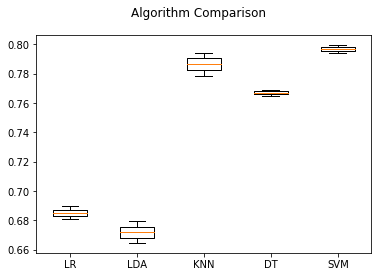

In [13]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

#Prepare training and test data
x_train = df_f_train.loc[:, df_f_train.columns != 'binary']
y_train = df_f_train.binary.values
x_test = df_f_test.loc[:, df_f_test.columns != 'binary']
y_test = df_f_test.binary.values

seed = 7
# Build a collection of classification models to evaluate
classifiers = []
classifiers.append(('LR', LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
                solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False,
                n_jobs=1)))
classifiers.append(('LDA', LinearDiscriminantAnalysis()))
classifiers.append(('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')))
classifiers.append(('DT', DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
           min_samples_split=2, min_samples_leaf=1, min_impurity_split=0 ,min_weight_fraction_leaf=0.0, max_features=None,
           random_state=None, max_leaf_nodes=None, class_weight=None, presort=False)))
classifiers.append(('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)))
# evaluate each model in turn
results = []
names = []
for name, model in classifiers:
    kfold = model_selection.KFold(n_splits=2, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=make_scorer(f1_score))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot results for different classification algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction_knn))
print(classification_report(y_test, prediction_svm))

NameError: name 'y_test' is not defined

# Experiments
Here we define all the experiments and compute the evaluation results of employing word representations to complex word identification.

In [11]:
from collections import namedtuple
Result = namedtuple('Result', 'model, dataset, measure')
ResultParams = namedtuple('Result', 'model, dataset, params, measure')
FeatureSet = namedtuple('FeatureSet', 'model, dataset, featTrain, featTest')
FeatureSetParams = namedtuple('FeatureSet', 'model, dataset, params, featTrain, featTest')

## (1) Dimension
First, we want to evaluate the influence of the dimension of the word representation on the three datasets. Therefore we use GloVe embeddings computed on Wikipedia+Gigaword 5 also denoted by 6B (50, 100, 200, 300) and computed on Twitter (25, 50, 100, 200).

In [12]:
from ngram_representation import ngram_repr_bow_mean
from ngram_representation import missing_strat_random

d_models = [model for model in models
              if ('wikipedia' in model.corpus or 'twitter' in model.corpus)]
data = datasets

ngram_repr = ngram_repr_bow_mean
missing_strat = missing_strat_random

print('Generating features...')

features_data = [FeatureSet(model, d, 
                        generate_embedding_feat(d.train, model.model, ngram_repr, missing_strat),
                        generate_embedding_feat(d.test, model.model, ngram_repr, missing_strat))
                 for model in models 
                 for d in datasets]

test_features = [fs for fs in features_data if fs.model.dimension==50 and fs.dataset.name == 'Wikipedia']

print('Evaluating features...')
results = [Result(fs.model, fs.dataset, average_classification_f1(fs.featTrain, fs.featTest)) for fs in features_data]

[ 1.5  2.5  3.5  4.5  5.5]
Generating features...
Evaluating features...
average_classification
average_classification
average_classification


In [13]:
d_models

[]

      dataset  dimension  f1-score
0   Wikipedia         50  0.721835
1    WikiNews         50  0.693772
2        News         50  0.766654
3   Wikipedia        100  0.713281
4    WikiNews        100  0.700641
5        News        100  0.763308
6   Wikipedia        200  0.685092
7    WikiNews        200  0.677316
8        News        200  0.736939
9   Wikipedia        300  0.689111
10   WikiNews        300  0.676716
11       News        300  0.734603
12  Wikipedia         25  0.739968
13   WikiNews         25  0.706891
14       News         25  0.743226
15  Wikipedia         50  0.731062
16   WikiNews         50  0.711757
17       News         50  0.750367
18  Wikipedia        100  0.719968
19   WikiNews        100  0.707012
20       News        100  0.763370
21  Wikipedia        200  0.721649
22   WikiNews        200  0.709904
23       News        200  0.753613


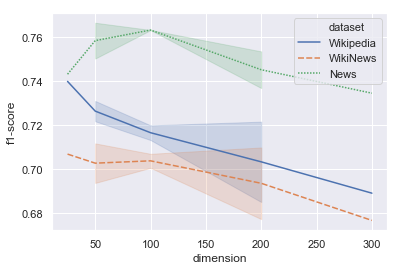

In [104]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

dimensions_data = [{'dimension' : result.model.dimension, 
                    'dataset' : result.dataset.name, 'f1-score' : result.measure[0]} 
                   for result in results]
dimensions_data = pd.DataFrame.from_records(dimensions_data)

dim_plot = sns.lineplot(x="dimension", y="f1-score",
             hue="dataset", style="dataset", err_style = 'band',
             data=dimensions_data)
print(dimensions_data)
plt.show(dim_plot)

In [101]:
dim_fig = dim_plot.get_figure()
dim_fig.savefig('D:/workspace_python/CoWoReId/dim_plot_svm.pdf')

## (2) Corpus
Second, we want to evaluate the influence of the corpus of the word representation on the three datasets. Therefore we use GloVe embeddings computed on Wikipedia+Gigaword 5 also denoted by 6B (50, 100, 200) and computed on Twitter (50, 100, 200).

In [111]:
from ngram_representation import ngram_repr_bow_mean
from ngram_representation import missing_strat_random

d_models = [model for model in models
              if (('wikipedia' in model.corpus or 'twitter' in model.corpus) 
                  and (model.dimension>=50 and model.dimension <=200))]
data = datasets

ngram_repr = ngram_repr_bow_mean
missing_strat = missing_strat_random

print('Generating features...')

features_data = [FeatureSet(model, d, 
                        generate_embedding_feat(d.train, model.model, ngram_repr, missing_strat),
                        generate_embedding_feat(d.test, model.model, ngram_repr, missing_strat))
                 for model in d_models 
                 for d in datasets]

test_features = [fs for fs in features_data if fs.model.dimension==50 and fs.dataset.name == 'Wikipedia']

print('Evaluating features...')
results = [Result(fs.model, fs.dataset, average_classification_f1(fs.featTrain, fs.featTest)) for fs in features_data]

Generating features...
Evaluating features...
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification


                 corpus    dataset  dimension  f1-score
0   wikipedia+gigaword5  Wikipedia         50  0.721835
1   wikipedia+gigaword5   WikiNews         50  0.693772
2   wikipedia+gigaword5       News         50  0.766654
3   wikipedia+gigaword5  Wikipedia        100  0.713281
4   wikipedia+gigaword5   WikiNews        100  0.700641
5   wikipedia+gigaword5       News        100  0.763308
6   wikipedia+gigaword5  Wikipedia        200  0.685092
7   wikipedia+gigaword5   WikiNews        200  0.677316
8   wikipedia+gigaword5       News        200  0.736939
9               twitter  Wikipedia         50  0.731062
10              twitter   WikiNews         50  0.711757
11              twitter       News         50  0.750367
12              twitter  Wikipedia        100  0.719968
13              twitter   WikiNews        100  0.707012
14              twitter       News        100  0.763370
15              twitter  Wikipedia        200  0.721649
16              twitter   WikiNews        200  0

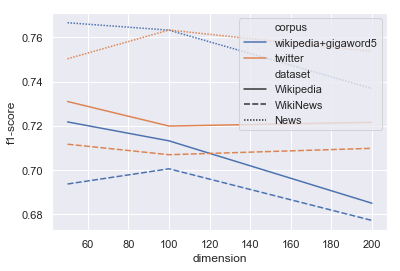

In [113]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

corpus_data = [{'dimension' : result.model.dimension, 
                    'dataset' : result.dataset.name, 'corpus': result.model.corpus , 'f1-score' : result.measure[0]} 
                   for result in results]
corpus_data = pd.DataFrame.from_records(corpus_data)

corpus_plot = sns.lineplot(x="dimension", y="f1-score",
             hue="corpus", style="dataset", err_style = 'band',
             data=corpus_data)
print(corpus_data)
plt.show(corpus_plot)

In [121]:
corpus_plot = corpus_plot.get_figure()
corpus_plot.savefig('D:/workspace_python/CoWoReId/dim_plot_corpus.pdf')

## (3) Model
Third, we want to evaluate the influence of the model used to train the word representation on the three datasets. Therefore we use GloVe (300), word2Vec (300) and FastText (300).

In [125]:
from ngram_representation import ngram_repr_bow_mean
from ngram_representation import missing_strat_random

d_models = [model for model in models
              if (model.dimension == 300)]
data = datasets

ngram_repr = ngram_repr_bow_mean
missing_strat = missing_strat_random

print('Generating features...')

features_data = [FeatureSet(model, d, 
                        generate_embedding_feat(d.train, model.model, ngram_repr, missing_strat),
                        generate_embedding_feat(d.test, model.model, ngram_repr, missing_strat))
                 for model in d_models 
                 for d in datasets]

test_features = [fs for fs in features_data if fs.model.dimension==50 and fs.dataset.name == 'Wikipedia']

print('Evaluating features...')
results = [Result(fs.model, fs.dataset, average_classification_f1(fs.featTrain, fs.featTest)) for fs in features_data]

Generating features...
Evaluating features...
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification


     dataset  dimension  f1-score     model
0  Wikipedia        300  0.689111     glove
1   WikiNews        300  0.676716     glove
2       News        300  0.734603     glove
3  Wikipedia        300  0.496983  word2vec
4   WikiNews        300  0.488283  word2vec
5       News        300  0.637511  word2vec
6  Wikipedia        300  0.538182  FastText
7   WikiNews        300  0.603957  FastText
8       News        300  0.674527  FastText


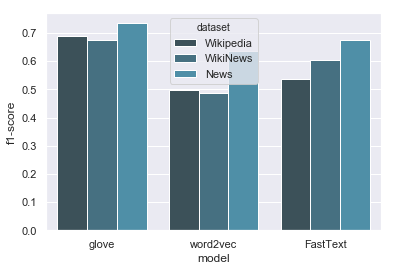

In [147]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="darkgrid", palette="GnBu_d")

model_data = [{'dimension' : result.model.dimension, 
                    'dataset' : result.dataset.name, 'model': result.model.type , 'f1-score' : result.measure[0]} 
                   for result in results]
model_data = pd.DataFrame.from_records(model_data)

model_plot = sns.barplot(x="model", y="f1-score", hue="dataset", data=model_data)
print(model_data)
plt.show(model_plot)

In [148]:
model_plot = model_plot.get_figure()
model_plot.savefig('D:/workspace_python/CoWoReId/model_plot.pdf')

## (4) Concatenations
Third, we want to evaluate the influence of the concatenating different kinds of word representations on the three datasets. Therefore we use GloVe (300), word2Vec (300) and FastText (300) word embeddings and experiment with different kinds of concatenations. First we focus on evaluating 2-combinations of word representations and generate the cross product. For example, we observe that concatenating glove50-wiki with glove50-twitter outperforms the single models with dimension 50 but also outperforms the single models with dimension 100 i.e. glove100-wiki and glove100-twitter.

In [199]:
from ngram_representation import ngram_repr_bow_mean
from ngram_representation import missing_strat_random

d_models = [model for model in models
              if (model.dimension >= 50 and model.dimension <=100)]
data = datasets

ngram_repr = ngram_repr_bow_mean
missing_strat = missing_strat_random

print('Generating features...')

#TODO consider using range for iterating the models to avoid double experiments
features_data = [FeatureSet((model1, model2), d, 
                        generate_embedding_feat_concat(d.train, [model1.model, model2.model], ngram_repr, missing_strat),
                        generate_embedding_feat_concat(d.test, [model1.model, model2.model], ngram_repr, missing_strat))
                 for model1 in d_models
                 for model2 in d_models
                 for d in datasets if model1 != model2]

print('Evaluating features...')
results = [Result(fs.model, fs.dataset, average_classification_f1(fs.featTrain, fs.featTest)) for fs in features_data]

Generating features...
Evaluating features...
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification


In [200]:
d_models

[Model(type='glove', name='glove.6B.50d.txt', dimension=50, corpus='wikipedia+gigaword5', model=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x0000005A8A8CCF60>),
 Model(type='glove', name='glove.6B.100d.txt', dimension=100, corpus='wikipedia+gigaword5', model=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x0000005AA3772550>),
 Model(type='glove', name='glove.twitter.27B.50d.txt', dimension=50, corpus='twitter', model=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x0000005B1995DF60>),
 Model(type='glove', name='glove.twitter.27B.100d.txt', dimension=100, corpus='twitter', model=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x0000005AF913DDD8>)]

      dataset  dimension  f1-score  \
0   Wikipedia        150  0.729056   
1    WikiNews        150  0.708293   
2        News        150  0.766483   
3   Wikipedia        100  0.735751   
4    WikiNews        100  0.718159   
5        News        100  0.768974   
6   Wikipedia        150  0.723558   
7    WikiNews        150  0.720331   
8        News        150  0.769860   
9   Wikipedia        150  0.729056   
10   WikiNews        150  0.708293   
11       News        150  0.766483   
12  Wikipedia        150  0.732394   
13   WikiNews        150  0.725047   
14       News        150  0.771968   
15  Wikipedia        200  0.733709   
16   WikiNews        200  0.721011   
17       News        200  0.775503   
18  Wikipedia        100  0.735751   
19   WikiNews        100  0.718159   
20       News        100  0.768974   
21  Wikipedia        150  0.732394   
22   WikiNews        150  0.725047   
23       News        150  0.771968   
24  Wikipedia        150  0.729242   
25   WikiNew

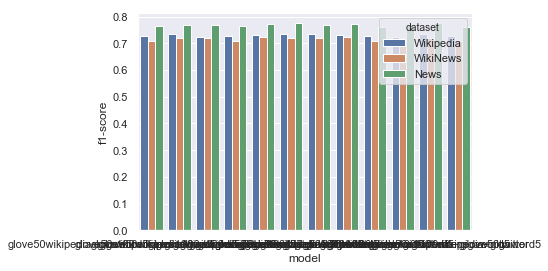

In [201]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

concat_model_data = [{'dimension' : (result.model[0].dimension + result.model[1].dimension),
                      'dataset' : result.dataset.name, 
                      'model': (result.model[0].type + \
                                str(result.model[0].dimension) + result.model[0].corpus \
                                + result.model[1].type +
                               str(result.model[1].dimension) + result.model[1].corpus) , 
                      'f1-score' : result.measure[0]} 
                      for result in results]
concat_model_data = pd.DataFrame.from_records(concat_model_data)

concat_model_plot = sns.barplot(x="model", y="f1-score", hue="dataset", data=concat_model_data)
print(concat_model_data)
plt.show(concat_model_plot)

## (5) NGram Representation
Here we investigate the performance of different kinds of aggregation methods for constructing ngram vector representations for MWE. Here it may be meaningful to filter the data first to only include e.g. bigrams, trigrams or ngrams. Then we compute classification scores for multiple classifiers/datasets/models and maybe aggregate them. Then we can visualize the individual ngram aggregation method scores.

### (1) Overall Influence of Representation

In [71]:
MAIN_PATH_DATASET = "../cwishareddataset/traindevset/english/"
genres = ['Wikipedia', 'WikiNews', 'News']
datasets = ['Train', 'Dev']
columns = ['id', 'sentence', "start", "end", "target", 
           "nat", "non_nat", "nat_marked", "non_nat_marked", "binary", "prob"]

Model = namedtuple('Model', 'type, name, dimension, corpus, model')
Dataset = namedtuple('Dataset', 'name, train, test')

datasets_init = [Dataset('Wikipedia', 'Train', 'Dev'),
            Dataset('WikiNews', 'Train', 'Dev'),
            Dataset('News', 'Train', 'Dev')]

def load_df(path):
    df = pd.read_csv(path, header=None, sep = "\t")
    df.columns = columns
    df['length'] = df.target.apply(lambda target : len(target.split()))
    return df.filter(['binary','target', 'length'], axis=1)

datasets = [Dataset(d.name, load_df(MAIN_PATH_DATASET + d.name + '_' + d.train + '.tsv'),
                            load_df(MAIN_PATH_DATASET + d.name + '_' + d.test + '.tsv')) for d in datasets_init]

In [72]:
def show_ngrams(dataframe):
    #return dataframe.groupby('length').describe()
    #return dataframe.loc[dataframe['length'] == 3,]
    return dataframe.length.unique()
    
[show_ngrams(dataset.test) for dataset in datasets]

[array([1, 3, 2, 4, 6, 8, 5], dtype=int64),
 array([1, 6, 3, 4, 2, 5], dtype=int64),
 array([1, 2, 3, 4, 5, 6], dtype=int64)]

In [30]:
word_freq_wiki = {}
sum_counts = 0
with open("resources/word-freq-dumps/enwiki-20150602-words-frequency.txt", encoding="utf8") as file:
    for line in file:
        word, freq = line.partition(" ")[::2]
        sum_counts+=int(freq)
        word_freq_wiki[word.strip()] = int(freq)
        
# This is with a laplace smoothing
def get_unigram_probability(word):
    if word not in word_freq_wiki:
        word = word.strip().lower() 
    return word_freq_wiki.get(word, 1) / (sum_counts + len(word_freq_wiki))

In [32]:
get_unigram_probability('aboriginal')

1.681961691432931e-05

In [57]:
from ngram_representation import ngram_repr_bow_mean
from ngram_representation import ngram_repr_bow_median
from ngram_representation import ngram_repr_bow_max
from ngram_representation import ngram_repr_bow_min
from ngram_representation import ngram_repr_weighted_bow

from ngram_representation import missing_strat_random
from ngram_representation import missing_strat_zeros

d_models = [model for model in models
              ]
data = datasets

NGramRepr = namedtuple('NGramRepr', 'name, repr')

alpha = 0.0001
ngram_weighted_bow_bind = lambda vecs, words : ngram_repr_weighted_bow(vecs, words, alpha, \
                                               get_unigram_probability, ngram_repr_bow_mean)
ngram_reprs = [NGramRepr('BoW', ngram_repr_bow_mean), NGramRepr('median', ngram_repr_bow_median),
               NGramRepr('max', ngram_repr_bow_max), NGramRepr('min', ngram_repr_bow_min) ,
               NGramRepr('w-BoW', ngram_weighted_bow_bind)]
missing_strat = missing_strat_random

print('Generating features...')

features_data = [FeatureSetParams(model, d, ngram_repr,
                        generate_embedding_feat(d.train, model.model, ngram_repr.repr, missing_strat),
                        generate_embedding_feat(d.test, model.model, ngram_repr.repr, missing_strat))
                 for ngram_repr in ngram_reprs
                 for model in d_models 
                 for d in datasets]


print('Evaluating features...')
results = [ResultParams(fs.model, fs.dataset, fs.params, average_classification_f1(fs.featTrain, fs.featTest)) for fs in features_data]

Generating features...
Evaluating features...
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_cla

       dataset  dimension  f1-score     model ngram_repr
0    Wikipedia         50  0.723841     glove        BoW
1     WikiNews         50  0.695059     glove        BoW
2         News         50  0.764322     glove        BoW
3    Wikipedia        100  0.710296     glove        BoW
4     WikiNews        100  0.701621     glove        BoW
5         News        100  0.762150     glove        BoW
6    Wikipedia        200  0.685046     glove        BoW
7     WikiNews        200  0.678698     glove        BoW
8         News        200  0.741163     glove        BoW
9    Wikipedia        300  0.675676     glove        BoW
10    WikiNews        300  0.677999     glove        BoW
11        News        300  0.731247     glove        BoW
12   Wikipedia         25  0.739306     glove        BoW
13    WikiNews         25  0.711715     glove        BoW
14        News         25  0.742433     glove        BoW
15   Wikipedia         50  0.732800     glove        BoW
16    WikiNews         50  0.71

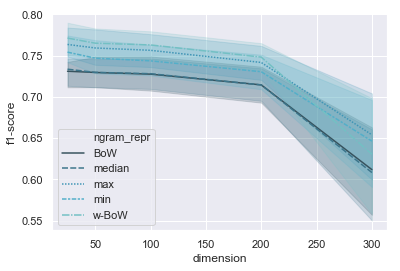

In [58]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="darkgrid", palette="GnBu_d")

ngram_data = [{'dimension' : result.model.dimension, 
               'dataset' : result.dataset.name, 'model': result.model.type , 
               'ngram_repr': result.params.name, 'f1-score' : result.measure[0]} 
                for result in results]
ngram_data = pd.DataFrame.from_records(ngram_data)

ngram_plot = sns.lineplot(x="dimension", y="f1-score",
             hue="ngram_repr", style="ngram_repr", err_style = 'band',
             data=ngram_data)
print(ngram_data)
plt.show(ngram_plot)

In [63]:
ngram_plot_fig = ngram_plot.get_figure()
ngram_plot_fig.savefig('D:/workspace_python/CoWoReId/ngram_plot_dim.pdf')

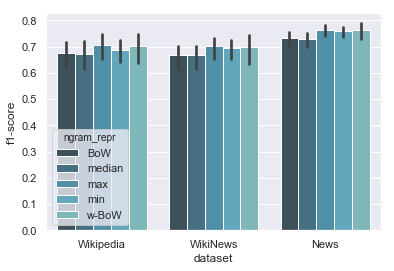

In [59]:
ngram_plot_per_dataset = sns.barplot(x="dataset", y="f1-score", hue="ngram_repr", data=ngram_data)
plt.show()

In [60]:
ngram_plot_per_dataset_fig = ngram_plot_per_dataset.get_figure()
ngram_plot_per_dataset_fig.savefig('D:/workspace_python/CoWoReId/ngram_per_dataset_all.pdf')

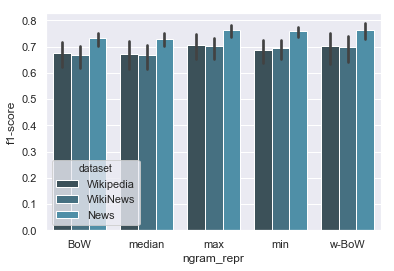

In [61]:
ngram_plot_per_repr = sns.barplot(x="ngram_repr", y="f1-score", hue="dataset", data=ngram_data)
plt.show()

In [62]:
ngram_plot_per_repr_fig = ngram_plot_per_repr.get_figure()
ngram_plot_per_repr_fig.savefig('D:/workspace_python/CoWoReId/ngram_per_repr_all.pdf')

### (2) Influence on N-Gram level

In [ ]:
from ngram_representation import ngram_repr_bow_mean
from ngram_representation import ngram_repr_bow_median
from ngram_representation import ngram_repr_bow_max
from ngram_representation import ngram_repr_bow_min
from ngram_representation import ngram_repr_weighted_bow

from ngram_representation import missing_strat_random
from ngram_representation import missing_strat_zeros

d_models = [model for model in models
              if (model.dimension == 50)]
data = datasets

NGramRepr = namedtuple('NGramRepr', 'name, repr')

alpha = 0.0001
ngram_weighted_bow_bind = lambda vecs, words : ngram_repr_weighted_bow(vecs, words, alpha, \
                                               get_unigram_probability, ngram_repr_bow_mean)
ngram_reprs = [NGramRepr('BoW', ngram_repr_bow_mean), NGramRepr('median', ngram_repr_bow_median),
               NGramRepr('max', ngram_repr_bow_max), NGramRepr('min', ngram_repr_bow_min) ,
               NGramRepr('w-BoW', ngram_weighted_bow_bind)]
missing_strat = missing_strat_random

print('Generating features...')

features_data = [FeatureSetParams(model, d, (ngram_repr, n),
                        generate_embedding_feat(d.train, model.model, ngram_repr.repr, missing_strat),
                        generate_embedding_feat(d.test.loc[d.test.length == n,], model.model, ngram_repr.repr, missing_strat))
                 for ngram_repr in ngram_reprs
                 for model in d_models 
                 for d in datasets
                 for n in d.test.length.unique() if n != 1]

print(len(features_data))

print('Evaluating features...')
results = [ResultParams(fs.model, fs.dataset, fs.params, average_classification_f1(fs.featTrain, fs.featTest)) for fs in features_data]

Generating features...
160
Evaluating features...
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average_classification
average

##### What happens with concatenations? What happens with varying alpha with the w-BoW approach, does it still outperform?